In [1]:
import pandas as pd
import numpy as np
import os
import json
from scipy import stats
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
#OOpening files
data = pd.read_json('weatherstation.json')
data.to_csv('weatherstation.csv', index=False)

dataset = pd.read_csv('weatherstation.csv')

df1 = dataset.dropna()

df2 = pd.read_csv('wind_data_sep.csv')

df3 = pd.read_csv('wind_data_nov.csv')

df4 = pd.read_csv('wind_data_oct.csv')

df1.shape

(13053, 7)

In [3]:
#Merging the wind data 

merged_df = pd.concat([df2, df3, df4])
#merged_df.shape
#merged_df

#merged_df.to_csv("Allwinda_data.csv", index=False)

df5s = pd.read_csv('Allwinda_data.csv')
datas = df5s.dropna()

datas.shape


(8544, 3)

In [4]:
#Merging all of data 
merged_dfs = pd.merge(datas, df1)


#merged_dfs.to_csv("merged_data.csv", index=False)
data = pd.read_csv('merged_data.csv')
dfs = pd.DataFrame(data)

dfs['timestamp'] = pd.to_datetime(dfs['timestamp'], errors='coerce')
data.shape


(4349, 9)

In [5]:
# Analysing the weather for september
dataset_sep = dfs[dfs.timestamp.between('2018-09-01', '2018-10-01')]
dataset_sep.shape
dataset_sep.tail
dataset_sep.describe()

,wind_speed,wind_direction,precipitation,humidity,radiation,sunshine,pressure,temperature
count,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000
mean,3.810247,133.398300,0.005846,64.170494,192.011134,352.286987,1019.453027,19.898887
std,2.049599,68.876349,0.084983,18.487345,259.186240,291.537178,6.025872,4.872723
min,0.085533,20.225667,0.000000,17.800000,0.000000,0.000000,1007.500000,7.300000
25%,2.208933,82.559333,0.000000,49.300000,0.000000,0.000000,1015.600000,16.800000
50%,3.483667,113.106667,0.000000,64.100000,4.900000,598.700000,1018.400000,19.800000
75%,5.093133,159.413333,0.000000,80.300000,391.600000,600.000000,1022.000000,23.300000
max,12.811333,329.040000,2.700000,96.200000,928.000000,600.000000,1039.700000,30.400000


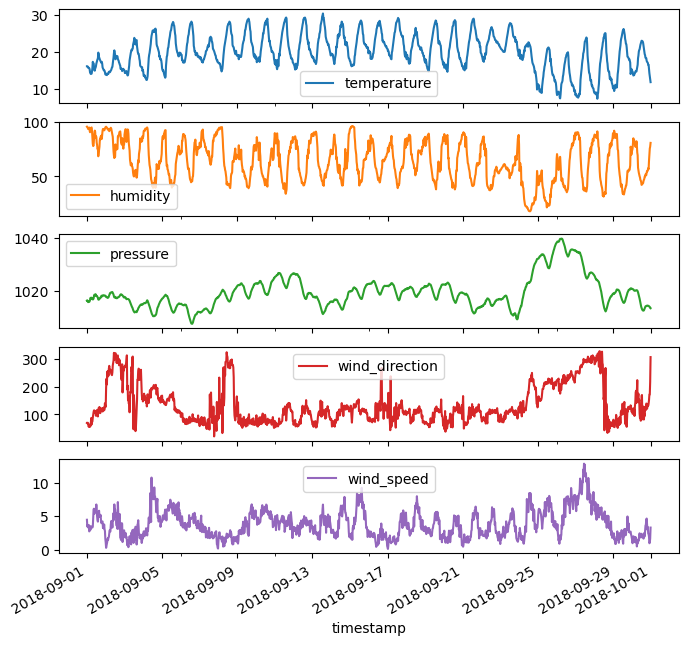

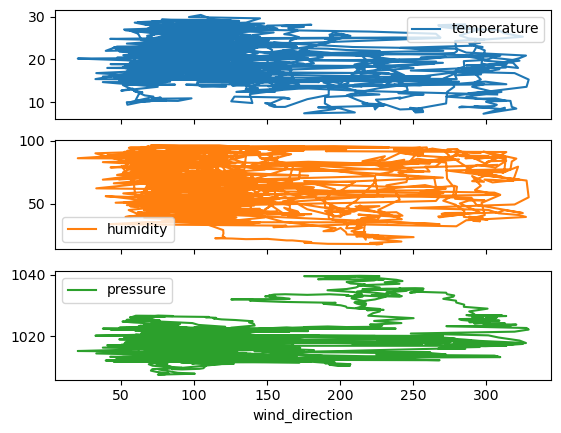

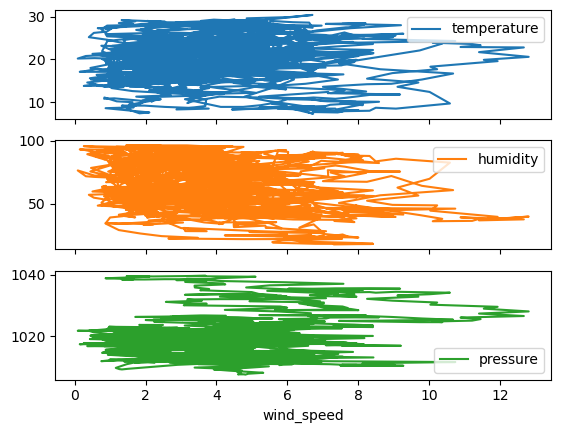

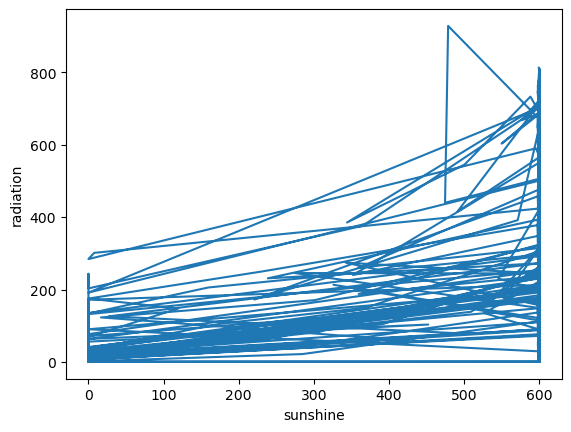

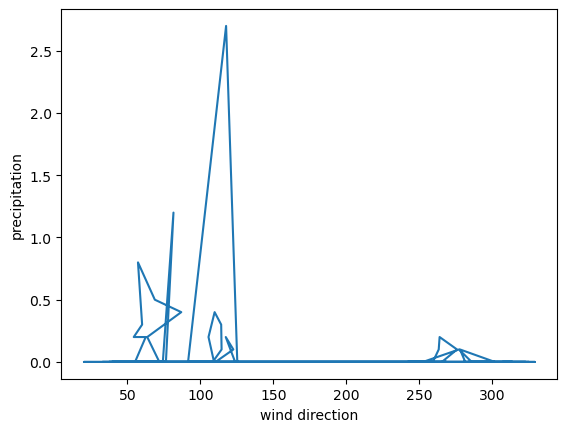

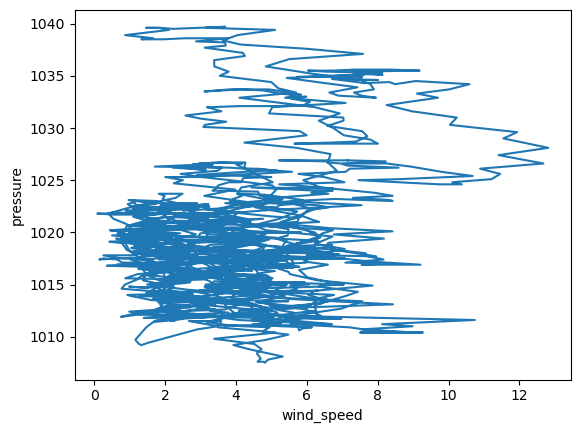

Text(0.5, 1.0, 'correlations heat map')

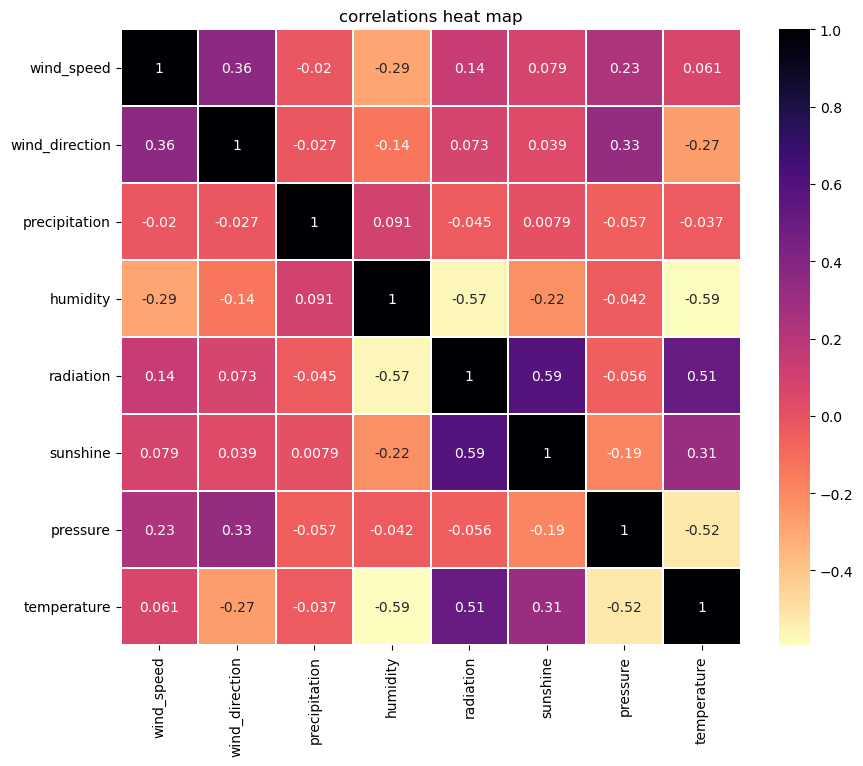

In [6]:
dataset_sep.plot(subplots=True, x='timestamp', y=['temperature','humidity','pressure','wind_direction', 'wind_speed' ], figsize=(8,8))

dataset_sep.plot(subplots=True, x='wind_direction', y= ['temperature','humidity','pressure'])

dataset_sep.plot(subplots=True, x='wind_speed', y= ['temperature','humidity','pressure'])



plt.show()


xpoints = dataset_sep['sunshine']
ypoints =dataset_sep['radiation']

plt.plot(xpoints,ypoints)
plt.ylabel('radiation')
plt.xlabel('sunshine')
plt.show()


xpo = dataset_sep['wind_direction']
ypo =dataset_sep['precipitation']
plt.plot(xpo, ypo )
plt.xlabel('wind direction')
plt.ylabel('precipitation')

plt.show()

plt.plot(dataset_sep['wind_speed'], dataset_sep['pressure'])
plt.xlabel('wind_speed')
plt.ylabel('pressure')

plt.show()


d_corr=dataset_sep.corr()
#print(d_corr)

fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(d_corr,annot=True,cmap='magma_r',linewidths=0.2)
plt.title("correlations heat map")



Conclusion:
For September, the temperature  was high from 13th to 20th then it goes down. There is a low pressure at the beginning of the month because the wind is moving fast which changes the wind direction drastically. but in the middle of the month the pressure increases as the wind starts to move slowly and affects the wind direction.

There is a positive relationship between wind direction, wind speed and pressure. The same applies to temperature, radiation and sunshine. Positive correlations between humidity and precipitation

In [7]:
# Analysing the weather for october
dataset_oct = dfs[dfs.timestamp.between('2018-10-01', '2018-11-01')]
dataset_oct.shape
dataset_oct.tail
dataset_oct.describe()

,wind_speed,wind_direction,precipitation,humidity,radiation,sunshine,pressure,temperature
count,1391.000000,1391.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000
mean,5.457371,241.176139,0.016487,71.460027,111.251413,145.986878,1018.147106,14.101211
std,2.980341,68.793003,0.085619,19.313082,186.044168,252.514070,7.330397,4.516593
min,0.088733,26.449600,0.000000,9.100000,0.000000,0.000000,989.500000,1.700000
25%,3.251967,225.333333,0.000000,56.125000,0.000000,0.000000,1015.200000,11.000000
50%,4.934533,264.060000,0.000000,76.100000,0.000000,0.000000,1020.100000,13.300000
75%,7.423967,286.460000,0.000000,88.000000,156.100000,174.950000,1023.200000,17.100000
max,14.504667,339.046667,1.300000,99.000000,684.500000,600.000000,1028.200000,26.400000


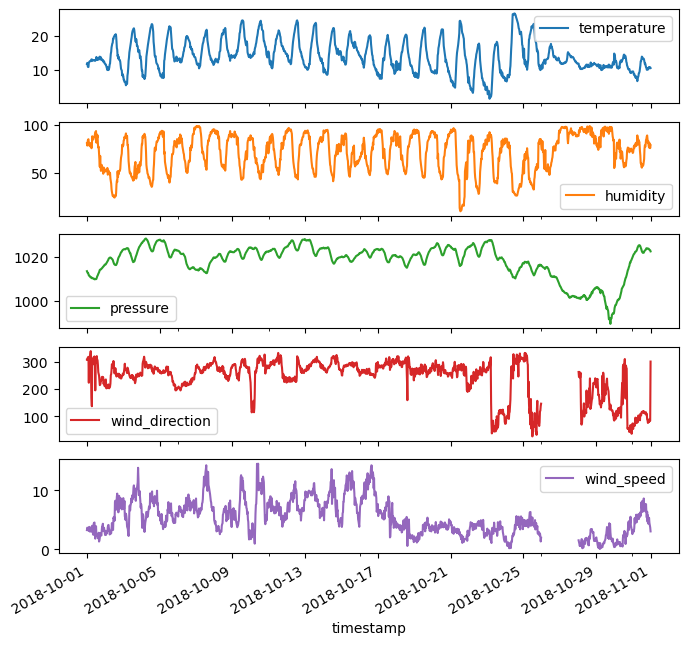

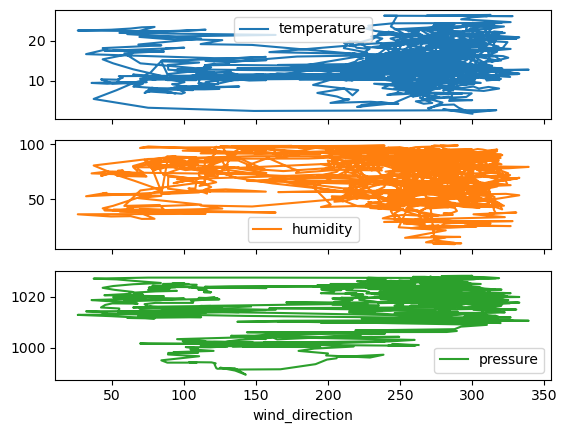

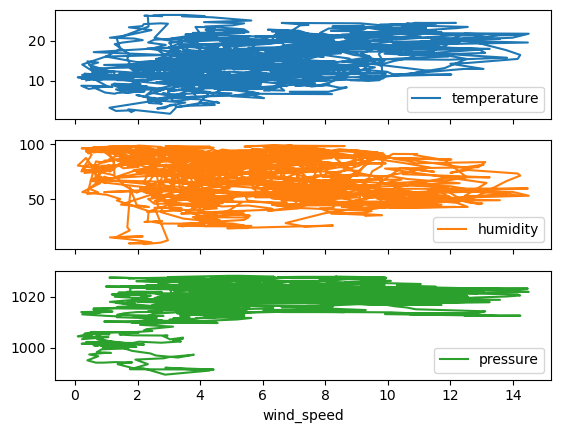

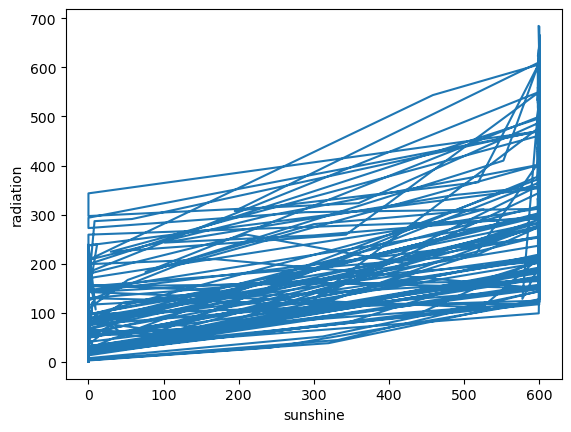

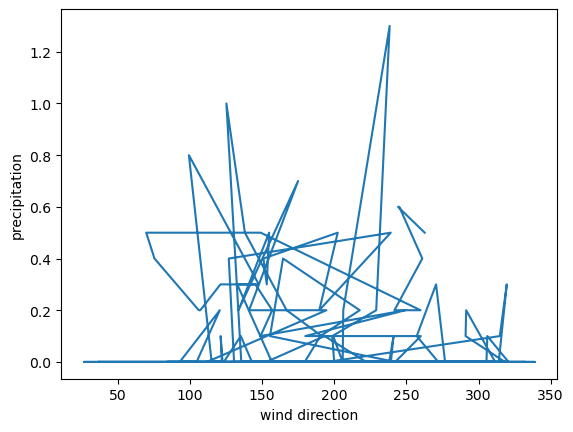

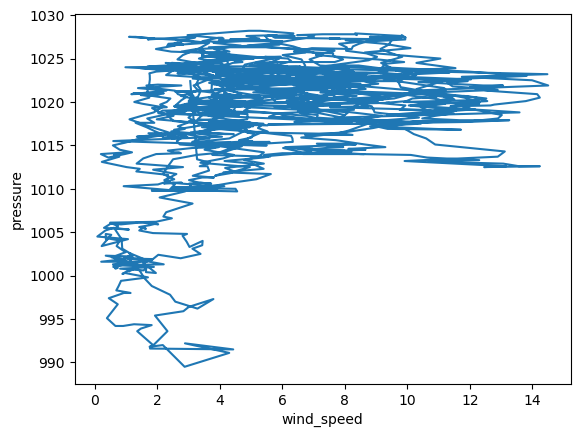

Text(0.5, 1.0, 'correlations heat map')

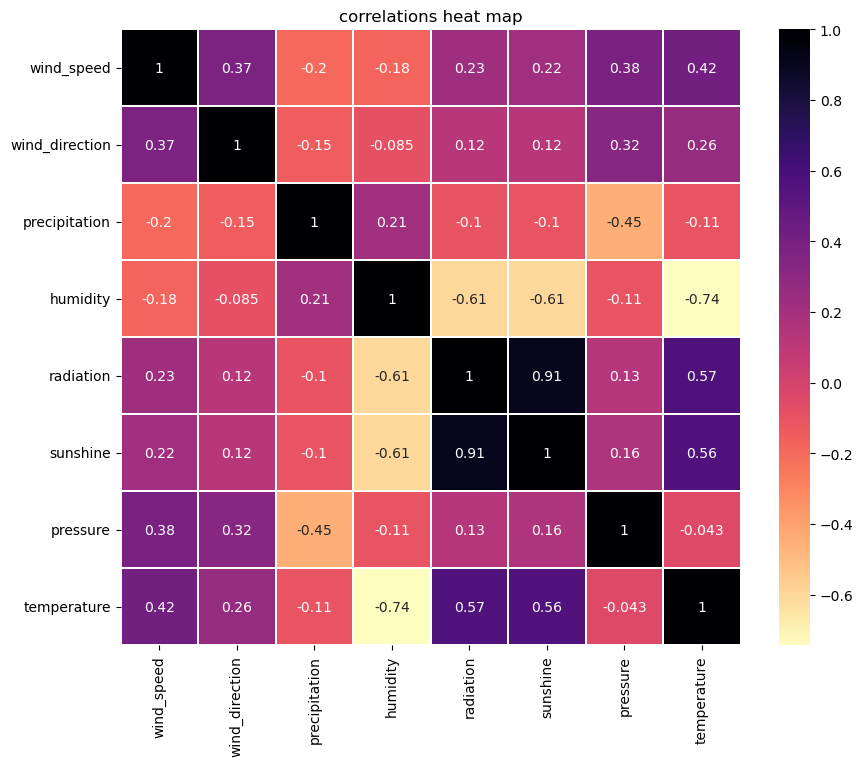

In [8]:
dataset_oct.plot(subplots=True, x='timestamp', y=['temperature','humidity','pressure','wind_direction', 'wind_speed' ], figsize=(8,8))

dataset_oct.plot(subplots=True, x='wind_direction', y= ['temperature','humidity','pressure'])

dataset_oct.plot(subplots=True, x='wind_speed', y= ['temperature','humidity','pressure'])


plt.show()


xpoints = dataset_oct['sunshine']
ypoints =dataset_oct['radiation']

plt.plot(xpoints,ypoints)
plt.ylabel('radiation')
plt.xlabel('sunshine')
plt.show()


xpo = dataset_oct['wind_direction']
ypo =dataset_oct['precipitation']
plt.plot(xpo, ypo )
plt.xlabel('wind direction')
plt.ylabel('precipitation')

plt.show()

plt.plot(dataset_oct['wind_speed'], dataset_oct['pressure'])
plt.xlabel('wind_speed')
plt.ylabel('pressure')

plt.show()


d_corr=dataset_oct.corr()
#print(d_corr)

fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(d_corr,annot=True,cmap='magma_r',linewidths=0.2)
plt.title("correlations heat map")


Conclusion:
For October, the temperature and humidity are high during the month, the temperature drops a little but not much. The pressure is also very high until the end of the month when the wind moves quickly and in turn changes direction. Precipitation in high and causing a lot of rain

There is a positive connection between pressure and radiation this month. The same applies to temperature, radiation and sunshine. Positive correlations between humidity and precipitation as well. A positive relationship between temperature and wind direction and wind speed.

In [9]:
# Analysing the weather for november
dataset_nov = dfs[dfs.timestamp.between('2018-11-01', '2018-11-30')]
dataset_nov.shape
dataset_nov.tail()
dataset_nov.describe()


,wind_speed,wind_direction,precipitation,humidity,radiation,sunshine,pressure,temperature
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.784357,225.108852,0.004559,86.017945,53.559479,65.389436,1019.911288,8.365991
std,1.792995,87.827943,0.027722,16.631432,100.889871,182.474680,6.653334,4.213875
min,0.239800,22.754333,0.000000,25.800000,0.000000,0.000000,1000.500000,-1.800000
25%,2.449633,157.077883,0.000000,81.500000,0.000000,0.000000,1016.500000,5.125000
50%,3.588700,262.473333,0.000000,92.600000,0.000000,0.000000,1020.500000,8.800000
75%,4.910717,291.401667,0.000000,97.100000,61.600000,0.000000,1025.100000,11.800000
max,10.876000,343.893333,0.400000,100.100000,494.500000,600.000000,1032.300000,18.100000


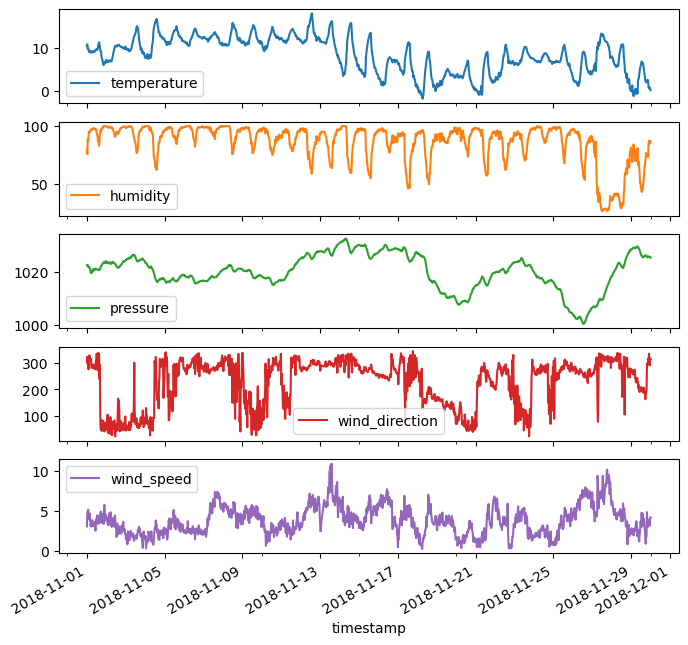

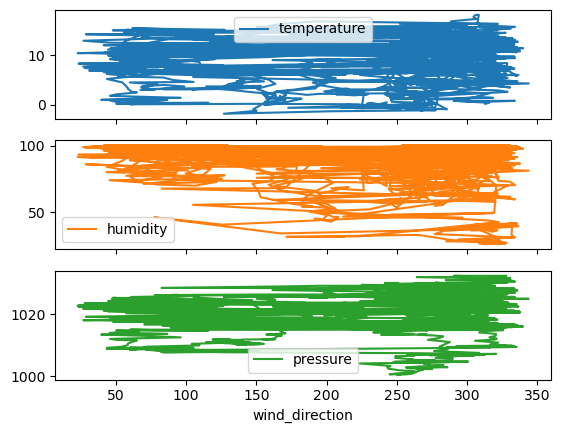

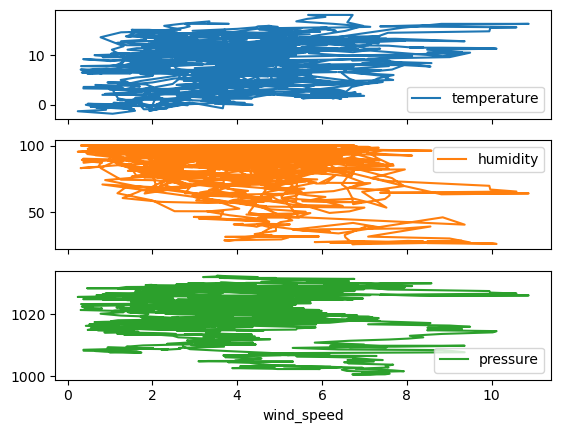

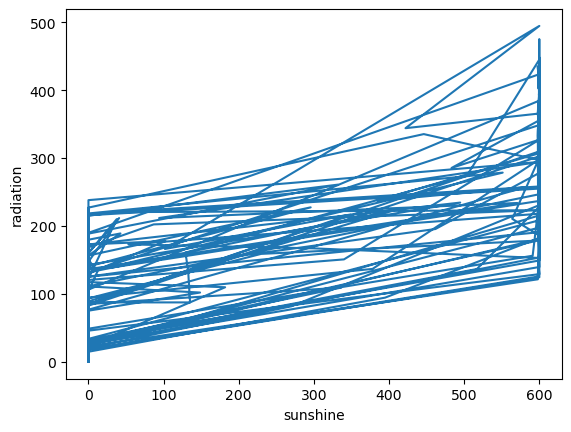

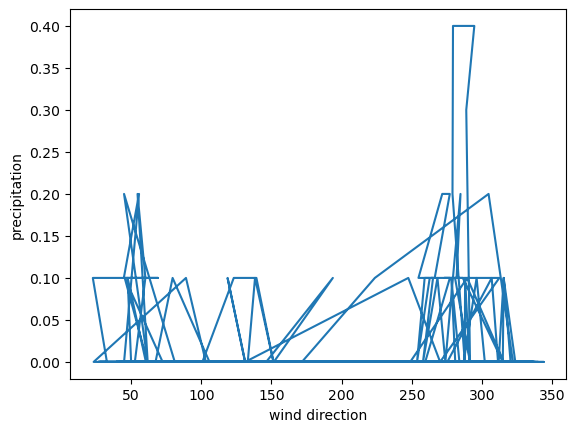

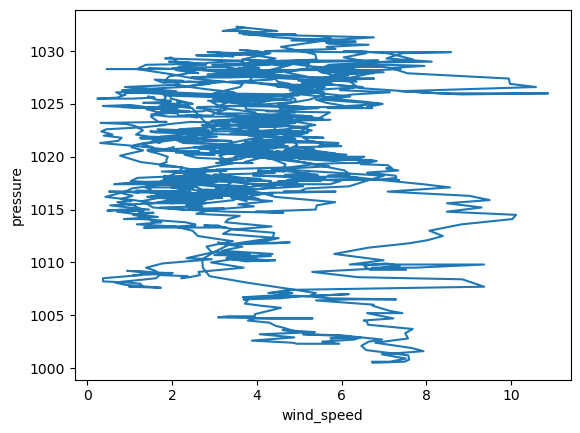

Text(0.5, 1.0, 'correlations heat map')

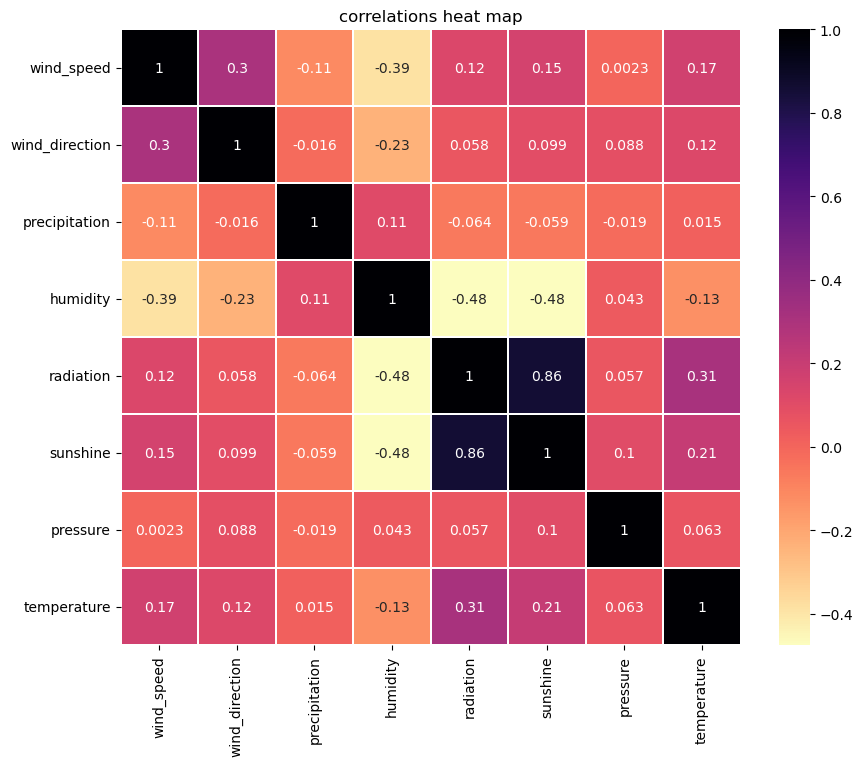

In [10]:
dataset_nov.plot(subplots=True, x='timestamp', y=['temperature','humidity','pressure','wind_direction', 'wind_speed' ], figsize=(8,8))

dataset_nov.plot(subplots=True, x='wind_direction', y= ['temperature','humidity','pressure'])

dataset_nov.plot(subplots=True, x='wind_speed', y= ['temperature','humidity','pressure'])


plt.show()


xpoints = dataset_nov['sunshine']
ypoints =dataset_nov['radiation']

plt.plot(xpoints,ypoints)
plt.ylabel('radiation')
plt.xlabel('sunshine')
plt.show()


xpo = dataset_nov['wind_direction']
ypo =dataset_nov['precipitation']
plt.plot(xpo, ypo )
plt.xlabel('wind direction')
plt.ylabel('precipitation')

plt.show()

plt.plot(dataset_nov['wind_speed'], dataset_nov['pressure'])
plt.xlabel('wind_speed')
plt.ylabel('pressure')

plt.show()


d_corr=dataset_nov.corr()
#print(d_corr)

fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(d_corr,annot=True,cmap='magma_r',linewidths=0.2)
plt.title("correlations heat map")

Conclusion:
For november, the temperature are high in the bigenning of the month but drops alot from the 15th to the end. The pressure varies under this month, sometimes it is low and a times high depending on how fast and slow the wind moves. 

There is a very positive correlation between sunshine and radiation. Negative relationship between temperature and humidity. But the positive correlations between wind speed and wind direction have dropped a lot compared to September and October.

In [11]:
#Comparing the weather for three month
dfs.shape
dfs.tail()
dfs.describe()

,wind_speed,wind_direction,precipitation,humidity,radiation,sunshine,pressure,temperature
count,4254.000000,4254.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000
mean,4.330021,200.072013,0.009014,73.755714,119.012762,187.900253,1019.175167,14.063049
std,2.449578,89.465862,0.071851,20.242165,201.234726,274.279481,6.712299,6.612058
min,0.085533,20.225667,0.000000,9.100000,0.000000,0.000000,989.500000,-1.800000
25%,2.513950,111.325833,0.000000,57.300000,0.000000,0.000000,1016.000000,9.700000
50%,3.868233,228.916667,0.000000,78.800000,0.000000,0.000000,1019.600000,13.400000
75%,5.670367,279.473333,0.000000,91.300000,165.700000,598.900000,1023.300000,18.900000
max,14.504667,343.893333,2.700000,100.100000,928.000000,600.000000,1039.700000,30.400000


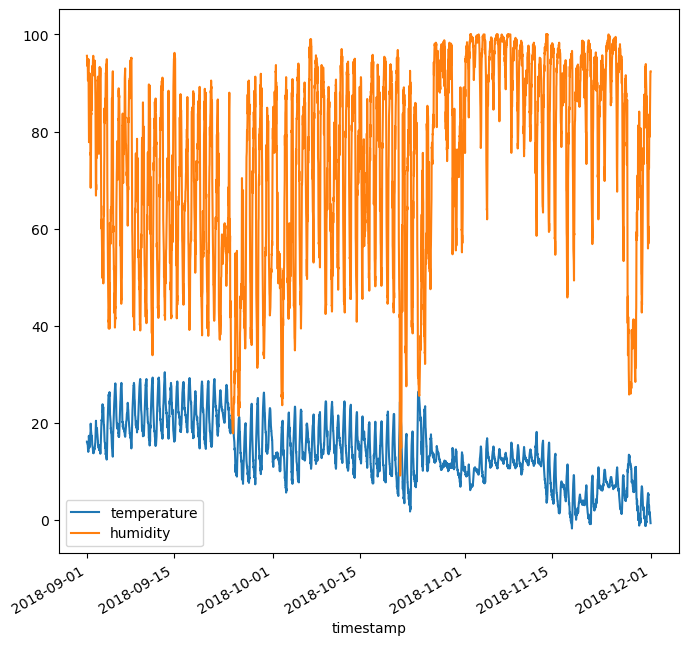

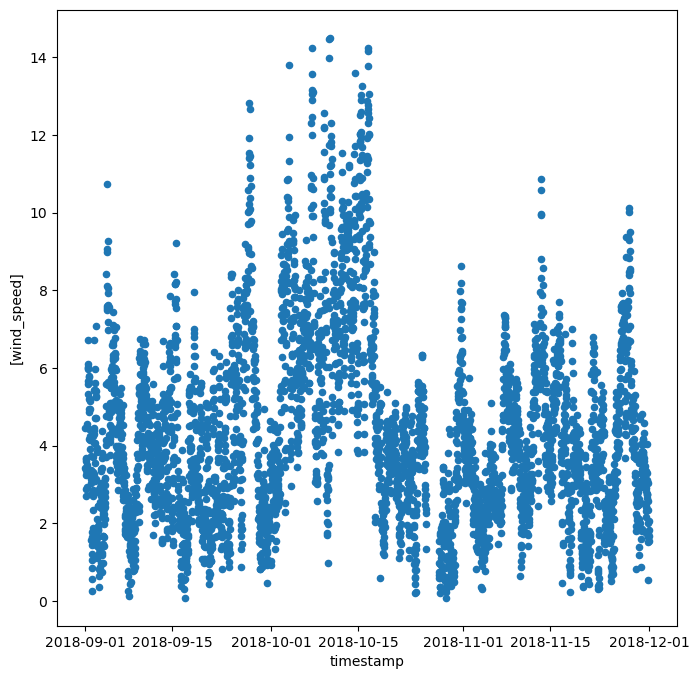

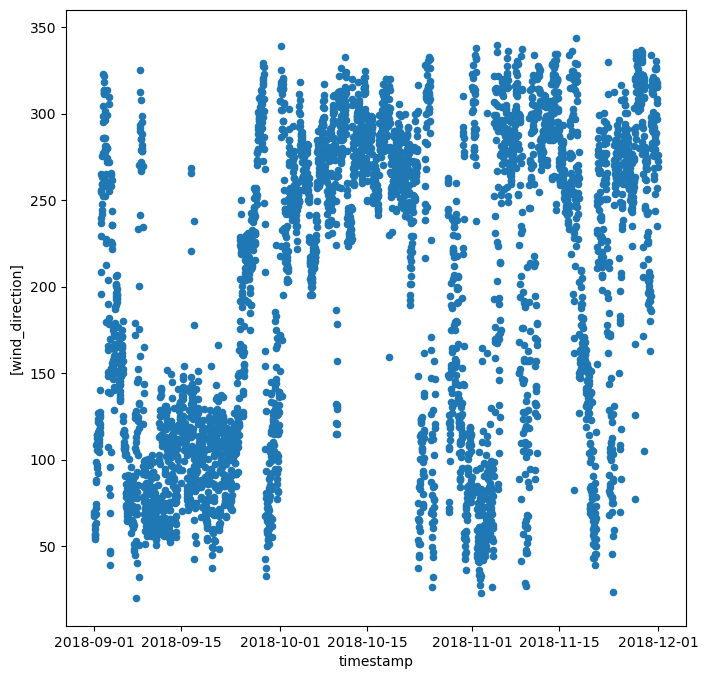

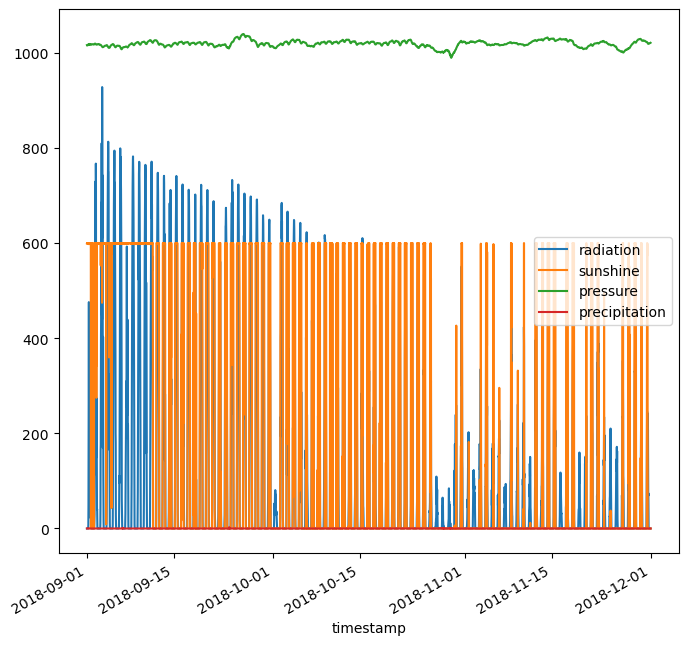

Text(0.5, 1.0, 'correlations heat map')

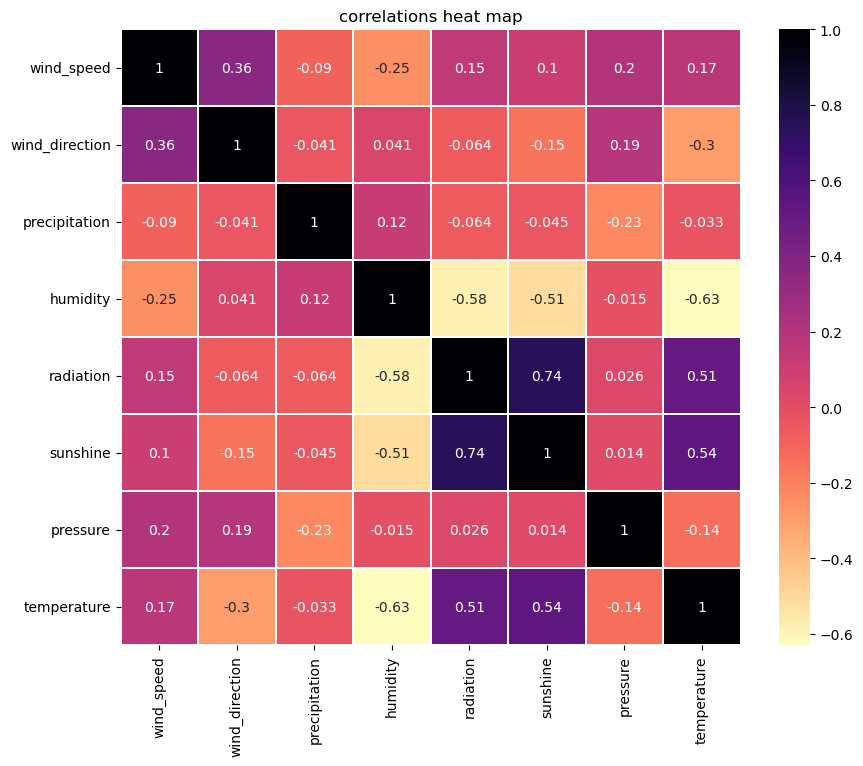

In [12]:
dfs.plot(x='timestamp', y=['temperature','humidity' ], figsize=(8,8))
plt.show()

dfs.plot. scatter(x='timestamp', y=['wind_speed' ], figsize=(8,8))

dfs.plot.scatter(x='timestamp', y=['wind_direction' ], figsize=(8,8))



plt.show()

# use a bar plot to visualize the comparison
dfs.plot(x='timestamp', y=['radiation','sunshine','pressure','precipitation' ], figsize=(8,8))
plt.show()




d_corr=dfs.corr()
#print(d_corr)

fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(d_corr,annot=True,cmap='magma_r',linewidths=0.2)
plt.title("correlations heat map")

For all three months, the temperature are highest in september and october and is lowest in novmber making the weather cold comperad to previous months.There is not a lot humidity in november. The wind moves fastest in october changing the win direction all the time, making the pressure low. September and november the pressure is high, wind moves slow. There is a lot of radiation in september becouse of the sun and a lot of precipitation in october ( a lot of rain) becouse of the humidity. The data shows also that there was rain in september and november but not as much as october. 